<a href="https://colab.research.google.com/github/ingridibagon/PitchDescomplica/blob/main/ProjetoFinalDescomplica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rede de Colaboraçao Pós Departamento de Física da UFMG

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt


Vou retirar os dados do site do departamneto d física da UFMG. O site contem tabelas do corpo docente, o corpo discente e os pós-doutorandos.

In [17]:
from urllib.request import url2pathname
url1='https://www.fisica.ufmg.br/posgraduacao/corpo-docente/'
url2='https://www.fisica.ufmg.br/posgraduacao/corpo-discente/'
url3='https://www.fisica.ufmg.br/posgraduacao/pos-doutorandos/'

Inicialmente vou fazer a leitura dos dados usando pandas e almazenar cada tabela em um dataframe. Usando a página como fonte dos dados permitira que a rede fique sempre atualizada.

In [18]:
#corpo docente
#lendo a tabela da página
tabela=pd.read_html(url1)

In [19]:
#colocando em um dataframe
df_cdoc=tabela[0]
df_cdoc.head(5)

,Nome,Telefone,E-mail,Sala
0,Livia Siman Gomes,3409-5685,liviasg,4126
1,Ado Jório de Vasconcelos,3409-6612,adojorio,4123S
2,Ana Maria de Paula,3409-6637,ana,4123
3,Ângelo Malachias de Souza,3409-5630,angeloms,4133
4,Ariete Righi,3409-6636,righi,3083D


In [20]:
df_cdoc.shape

(57, 4)

In [21]:
#corpo dicente
#lendo a tabele da página
tabela=pd.read_html(url2)
#colocando os dados em dataframes
df_cdic_mestrado=tabela[0]
df_cdic_doutorado=tabela[1]

In [22]:
df_cdic_mestrado.rename(columns=df_cdic_mestrado.iloc[0, :], inplace=True)
df_cdic_mestrado.drop(df_cdic_mestrado.index[0], inplace=True)
df_cdic_mestrado.reset_index(inplace=True, drop=True)

In [23]:
df_cdic_mestrado.head()

,NaN,Aluno/a,Entrada,Matrícula,Orientador/a,Agência,Início bolsa,Término bolsa,Prazo término curso
0,1.0,Alan Augusto Silva Sousa,mar/23,2023663215,Lucas Wardil,CAPES,mar/23,fev/25,ago/25
1,2.0,Allan Gabriel Marques Lima,abr/22,2022665397,Mario Mazzoni,NaN,NaN,NaN,set/24
2,3.0,Ana Carolina dos Santos,ago/23,2023707450,Rogério Paniago,CNPq,ago/23,jul/25,jan/26
3,4.0,André Felipe Alves Alencar,ago/23,2023709541,Mario Mazzoni,NaN,NaN,NaN,jan/26
4,5.0,André Marques da Costa,mai/21,2021663463,Leonardo Neves,CAPES,mai/23,abr/24,abr/24


In [24]:
df_cdic_mestrado.columns

Index([                  nan,             'Aluno/a',             'Entrada',
                 'Matrícula',        'Orientador/a',             'Agência',
              'Início bolsa',       'Término bolsa', 'Prazo término curso'],
      dtype='object')

Vou deletas as colunas que nao sao relevantes para a contruçao da rede: NaN, Entrada, Matricuña Agencia, Inicio bolsa, Termino bolsa, Prazo término curso

In [25]:
df_cdicm=df_cdic_mestrado.drop(['Entrada', 'Matrícula', 'Agência','Início bolsa', 'Término bolsa', 'Prazo término curso'], axis=1)
df_cdicm.head()

,NaN,Aluno/a,Orientador/a
0,1.0,Alan Augusto Silva Sousa,Lucas Wardil
1,2.0,Allan Gabriel Marques Lima,Mario Mazzoni
2,3.0,Ana Carolina dos Santos,Rogério Paniago
3,4.0,André Felipe Alves Alencar,Mario Mazzoni
4,5.0,André Marques da Costa,Leonardo Neves


In [26]:
df_cdicm=df_cdicm[df_cdicm.columns.dropna()]
df_cdicm

,Aluno/a,Orientador/a
0,Alan Augusto Silva Sousa,Lucas Wardil
1,Allan Gabriel Marques Lima,Mario Mazzoni
2,Ana Carolina dos Santos,Rogério Paniago
3,André Felipe Alves Alencar,Mario Mazzoni
4,André Marques da Costa,Leonardo Neves
...,...,...
90,Vitor Augusto Firmino Torres,NaN
91,Vitor de Melo Almada,Paulo Sérgio Guimarães
92,Vitor Guilherme de Souza Pereira,Gláuber Dorsch
93,Willyan Cardoso Santos da Silva,Leandro Malard


In [27]:
df_cdic_mestrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nan                  95 non-null     float64
 1   Aluno/a              95 non-null     object 
 2   Entrada              95 non-null     object 
 3   Matrícula            95 non-null     object 
 4   Orientador/a         75 non-null     object 
 5   Agência              41 non-null     object 
 6   Início bolsa         40 non-null     object 
 7   Término bolsa        40 non-null     object 
 8   Prazo término curso  95 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.8+ KB


In [28]:
df_cdic_doutorado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       82 non-null     float64
 1   1       83 non-null     object 
 2   2       83 non-null     object 
 3   3       83 non-null     object 
 4   4       81 non-null     object 
 5   5       63 non-null     object 
 6   6       62 non-null     object 
 7   7       62 non-null     object 
 8   8       83 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.0+ KB


In [29]:
df_cdic_doutorado.head()

,0,1,2,3,4,5,6,7,8
0,NaN,Aluno/a,Entrada,Matrícula,Orientador/a,Agência,Início bolsa,Término bolsa,Prazo término curso
1,1.0,Alessandra Chioquetta,dez/20,2020720510,Raphael Drumond,CNPq,fev/21,jan/26,mai/26
2,2.0,Ana Luiza Novaes Dias,jul/22,2022685444,Ronald Dickman,FAPEMIG,ago/22,jul/26,jul/27
3,3.0,Ana Paula Gomes Pereira,ago/19,2019746705,Pablo Saldanha,NaN,NaN,NaN,jan/25
4,4.0,Arilton Raimundo Souza Macedo,mar/19,2019663591,João Antônio Plascak,NaN,NaN,NaN,ago/24


In [30]:
df_cdic_doutorado.rename(columns=df_cdic_doutorado.iloc[0, :], inplace=True)
df_cdic_doutorado.drop(df_cdic_doutorado.index[0], inplace=True)
df_cdic_doutorado.reset_index(inplace=True, drop=True)
df_cdic_doutorado.columns

Index([                  nan,             'Aluno/a',             'Entrada',
                 'Matrícula',        'Orientador/a',             'Agência',
              'Início bolsa',       'Término bolsa', 'Prazo término curso'],
      dtype='object')

In [31]:
df_cdicd=df_cdic_doutorado.drop(['Entrada', 'Matrícula', 'Agência','Início bolsa', 'Término bolsa', 'Prazo término curso'], axis=1)


In [32]:
df_cdicd=df_cdicd[df_cdicd.columns.dropna()]
df_cdicd.head()

,Aluno/a,Orientador/a
0,Alessandra Chioquetta,Raphael Drumond
1,Ana Luiza Novaes Dias,Ronald Dickman
2,Ana Paula Gomes Pereira,Pablo Saldanha
3,Arilton Raimundo Souza Macedo,João Antônio Plascak
4,Arthur Cesar Dinali Viglioni,Gláuber Dorsch (Bruce Vega – C)


In [33]:
#pós-doutorandos
tabela=pd.read_html(url3)
df_posdoc=tabela[0]
df_posdoc.head()

,0,1,2
0,Pos-Doc,Email,Supervisor/a
1,ALESSANDRA FRIEDRICH LUTZ,sandiflutz@gmail.com,Lucas Lages Wardil
2,ALEXANDRE GUTENBERG DA COSTA MOURA,alex.gutenberg@ict.ufvjm.edu.br,Carlos Henrique Monken
3,BONNIE ROMANO ZAIRE,bonniezaire@gmail.com,Silvia Helena Paixao Alencar
4,BRUNO HENRIQUE DA SILVA E MENDONÇA,brunnohennrique13@gmail.com,Helio Chacham


In [34]:
df_posdoc.rename(columns=df_posdoc.iloc[0, :], inplace=True)
df_posdoc.drop(df_posdoc.index[0], inplace=True)

df_posdoc.head()

,Pos-Doc,Email,Supervisor/a
1,ALESSANDRA FRIEDRICH LUTZ,sandiflutz@gmail.com,Lucas Lages Wardil
2,ALEXANDRE GUTENBERG DA COSTA MOURA,alex.gutenberg@ict.ufvjm.edu.br,Carlos Henrique Monken
3,BONNIE ROMANO ZAIRE,bonniezaire@gmail.com,Silvia Helena Paixao Alencar
4,BRUNO HENRIQUE DA SILVA E MENDONÇA,brunnohennrique13@gmail.com,Helio Chacham
5,CAMILA MARIA DE SOUSA LACERDA,cmslacerda@gmail.com,Flávio Orlando Plentz


In [35]:
df_posdoc.reset_index(inplace=True, drop=True)
df_posdoc.head()

,Pos-Doc,Email,Supervisor/a
0,ALESSANDRA FRIEDRICH LUTZ,sandiflutz@gmail.com,Lucas Lages Wardil
1,ALEXANDRE GUTENBERG DA COSTA MOURA,alex.gutenberg@ict.ufvjm.edu.br,Carlos Henrique Monken
2,BONNIE ROMANO ZAIRE,bonniezaire@gmail.com,Silvia Helena Paixao Alencar
3,BRUNO HENRIQUE DA SILVA E MENDONÇA,brunnohennrique13@gmail.com,Helio Chacham
4,CAMILA MARIA DE SOUSA LACERDA,cmslacerda@gmail.com,Flávio Orlando Plentz


In [36]:
#Tirando a coluna do e-mail
df_pd=df_posdoc.drop(['Email'], axis=1)


Inicialmente vou contruir uma rede interna da pós onde cada estudante está conectado com seu orientador/a e seu coorientado e cada posdoc está conectado com seu supervisor.

vou adicionar a coluna cor nos dataframes mestrado e doutorado para conseguir um brafo com nodos de diferentes cores para mestrandos, doutorandos e pós-doutorandos

In [37]:
df_cdicm['Cor']='orange'
df_cdicm.head()

,Aluno/a,Orientador/a,Cor
0,Alan Augusto Silva Sousa,Lucas Wardil,orange
1,Allan Gabriel Marques Lima,Mario Mazzoni,orange
2,Ana Carolina dos Santos,Rogério Paniago,orange
3,André Felipe Alves Alencar,Mario Mazzoni,orange
4,André Marques da Costa,Leonardo Neves,orange


In [38]:
df_cdicd['Cor']='green'
df_cdicd.head()

,Aluno/a,Orientador/a,Cor
0,Alessandra Chioquetta,Raphael Drumond,green
1,Ana Luiza Novaes Dias,Ronald Dickman,green
2,Ana Paula Gomes Pereira,Pablo Saldanha,green
3,Arilton Raimundo Souza Macedo,João Antônio Plascak,green
4,Arthur Cesar Dinali Viglioni,Gláuber Dorsch (Bruce Vega – C),green


In [39]:
df_pd['Cor']='blue'
df_pd.head()

,Pos-Doc,Supervisor/a,Cor
0,ALESSANDRA FRIEDRICH LUTZ,Lucas Lages Wardil,blue
1,ALEXANDRE GUTENBERG DA COSTA MOURA,Carlos Henrique Monken,blue
2,BONNIE ROMANO ZAIRE,Silvia Helena Paixao Alencar,blue
3,BRUNO HENRIQUE DA SILVA E MENDONÇA,Helio Chacham,blue
4,CAMILA MARIA DE SOUSA LACERDA,Flávio Orlando Plentz,blue


Vou renomear os nomes das colunas com aluno/posdoc e supervisor/a para concatenar em um sola tabela e poder criar o grafico do grafo apartir dessa tabela

In [40]:
df_cdicm.rename(columns={'Aluno/a':'Aluno/Pos-doc','Orientador/a':'Orientador/Supervisor'}, inplace=True)
df_cdicd.rename(columns={'Aluno/a':'Aluno/Pos-doc','Orientador/a':'Orientador/Supervisor'}, inplace=True)
df_pd.rename(columns={'Pos-Doc':'Aluno/Pos-doc','Supervisor/a':'Orientador/Supervisor'}, inplace=True)

In [41]:
new=pd.concat([df_cdicm,df_cdicd,df_pd])

In [42]:
new.shape

(204, 3)

In [43]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aluno/Pos-doc          204 non-null    object
 1   Orientador/Supervisor  182 non-null    object
 2   Cor                    204 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [44]:
new['Orientador/Supervisor'].unique()

array(['Lucas Wardil', 'Mario Mazzoni', 'Rogério Paniago',
       'Leonardo Neves', 'Leandro Malard',
       'Simone Silva Alexandre (Luiz Cláudio Carvalho – C)', nan,
       'Karla Balzuweit', 'Ubirajara Agero', 'Gláuber Carvalho Dorsch',
       'Simone Alexandre', 'Ado Jorio', 'Simone Silva Alexandre',
       'Leonardo Campos', 'Silvia Helena Alencar', 'Carlos Basílio',
       'Bernardo Neves', 'Nelson Yokomizo', 'Gerald Weber',
       'Emmanuel Araújo', 'Walber Hugo de Brito',
       'Ariete Righi (Marcos Pimenta – C)', 'Ariete Righi',
       'José Rachid Mohallem', 'Ubirajara Agero (Livia Siman – C)',
       'Gustavo Guerrero', 'Bruce Vega', 'Carlos Henrique Monken',
       'Maria Carolina Aguiar',
       'Ricardo Wagner Nunes (Simone Alexandre – C)',
       'Ana Maria de Paula', 'Luiz Gustavo Cançado', 'Angelo Malachias',
       'Gláuber Dorsch (Nelson Yokomizo – C)', 'Raphael Drumond',
       'Reinaldo Vianna', 'Wagner Nunes Rodrigues', 'Edmar Soares',
       'Gabriel Franco',
  

Alguns estudantes tem coorientador que também é professor. E se encontra em parentesis na coluna orientador. Vou fazer um split e um rstripe nos dataframes mestrado e doutorado para obter esses links

In [45]:
todos=new.copy(deep=True)

In [46]:
todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aluno/Pos-doc          204 non-null    object
 1   Orientador/Supervisor  182 non-null    object
 2   Cor                    204 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [47]:
todos['Orientador/Supervisor']=todos['Orientador/Supervisor'].str.split('(')
todos=todos.explode('Orientador/Supervisor')


In [48]:
todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aluno/Pos-doc          222 non-null    object
 1   Orientador/Supervisor  200 non-null    object
 2   Cor                    222 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [49]:
todos['Orientador/Supervisor']=todos['Orientador/Supervisor'].str.rstrip(' – C)')


In [50]:
todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aluno/Pos-doc          222 non-null    object
 1   Orientador/Supervisor  200 non-null    object
 2   Cor                    222 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


Fazendo uma copia do dataframe com todos os estudantes e pós-docs para remover os nulos

In [51]:
todos1=todos.copy(deep=True)

In [52]:
todos1.dropna(inplace=True)

In [53]:
todos1.head(40)

,Aluno/Pos-doc,Orientador/Supervisor,Cor
0,Alan Augusto Silva Sousa,Lucas Wardil,orange
1,Allan Gabriel Marques Lima,Mario Mazzoni,orange
2,Ana Carolina dos Santos,Rogério Paniago,orange
3,André Felipe Alves Alencar,Mario Mazzoni,orange
4,André Marques da Costa,Leonardo Neves,orange
5,Augusto Vieira D’assunção Freitas,Leandro Malard,orange
6,Barbara Alves Land Ferreira,Simone Silva Alexandre,orange
6,Barbara Alves Land Ferreira,Luiz Cláudio Carvalho,orange
8,Breno Barbosa Moreira,Karla Balzuweit,orange
10,Bruno Guimarães Santana Gomes,Ubirajara Agero,orange


In [54]:
Profesores=list(todos1['Orientador/Supervisor'].unique())

In [55]:
sorted(Profesores)


['Ado Jorio',
 'Ado Jorio de Vasconcelos',
 'Alexis Aguirre',
 'Ana Maria de Paula',
 'Angelo Malachias',
 'Antônio Sergio Pires',
 'Ariete Righi',
 'Bernardo Neves',
 'Bernardo Ruegger Almeida Neves',
 'Bruce Vega',
 'Carlos Basílio',
 'Carlos Basílio Pinheiro',
 'Carlos Henrique Monken',
 'Edmar Avellar Soares',
 'Edmar Soares',
 'Emmanuel Araújo',
 'Flávio Orlando Plentz',
 'Francisco Maia',
 'Gabriel Franco',
 'Gerald Weber',
 'Gláuber Carvalho Dorsch',
 'Gláuber Dorsch',
 'Gustavo Guerrero',
 'Gustavo Safar',
 'Helio Chacham',
 'José Rachid Mohallem',
 'João Antônio Plascak',
 'João Francisco Coelho',
 'Juan Carlos Gonzalez Perez',
 'Juan Carlos González Pérez',
 'Karla Balzuweit',
 'Leandro Malard',
 'Leonardo Campos',
 'Leonardo Cristiano Campos',
 'Leonardo Neves',
 'Livia Siman',
 'Livia Siman Gomes',
 'Lucas Lages Wardil',
 'Lucas Mol',
 'Lucas Wardil',
 'Luiz Cláudio Carvalho',
 'Luiz Gustavo Cançado',
 'Lívia Siman',
 'Lívia Siman Gomes',
 'Marcelo Terra Cunha',
 'Marcos Pi

Alguns docentes se encontram com todos os nomes e sobrenomes em algumas tabelas e apenas com nome e sobrenome em outras. Vamos padronizar o nome dos professores antes de criar os grafos.

In [56]:
nomes={'Ado Jorio de Vasconcelos':'Ado Jorio',
       'Bernardo Ruegger Almeida Neves':'Bernardo Neves',
       'Carlos Basílio Pinheiro':'Carlos Basílio',
      'Edmar Avellar Soares':'Edmar Soares',
       'Gláuber Carvalho Dorsch':'Gláuber Dorsch',
       'Juan Carlos Gonzalez Perez':'Juan Carlos González Perez',
       'Leonardo Cristiano Campos':'Leonardo Campos',
       'Livia Siman Gomes':'Lívia Siman',
       'Lucas Lages Wardil':'Lucas Wardil',
       'Livia Siman':'Lívia Siman',
       'Lívia Siman Gomes':'Lívia Siman',
       'Mario Sergio de Carvalho Mazzoni':'Mário Mazzoni',
       'Mario Mazzoni':'Mário Mazzoni',
       'Paulo Sérgio Soares Guimarães':'Paulo Sérgio Guimarães',
       'Paulo Sergio Guimarães':'Paulo Sérgio Guimarães',
       'Roberto Magalhaes Paniago':'Roberto Paniago',
       'Rodrigo Gribel Lacerda':'Rodrigo Gribel',
       'Silvia Helena Paixao Alencar':'Silvia Helena Alencar',
       'Simone Silva Alexandre':'Simone Alexandre',
       'Wagner Jose Corradi Barbosa':'Wagner Corradi'
       }

In [57]:
todos.reset_index(inplace=True, drop=True)
todos1.reset_index(inplace=True, drop=True)

In [58]:
todos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Aluno/Pos-doc          222 non-null    object
 1   Orientador/Supervisor  200 non-null    object
 2   Cor                    222 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [59]:
len(todos['Orientador/Supervisor'])

222

In [60]:
todos1['Orientador/Supervisor']
todos1.head(40)

,Aluno/Pos-doc,Orientador/Supervisor,Cor
0,Alan Augusto Silva Sousa,Lucas Wardil,orange
1,Allan Gabriel Marques Lima,Mario Mazzoni,orange
2,Ana Carolina dos Santos,Rogério Paniago,orange
3,André Felipe Alves Alencar,Mario Mazzoni,orange
4,André Marques da Costa,Leonardo Neves,orange
5,Augusto Vieira D’assunção Freitas,Leandro Malard,orange
6,Barbara Alves Land Ferreira,Simone Silva Alexandre,orange
7,Barbara Alves Land Ferreira,Luiz Cláudio Carvalho,orange
8,Breno Barbosa Moreira,Karla Balzuweit,orange
9,Bruno Guimarães Santana Gomes,Ubirajara Agero,orange


In [61]:
supervisores=list(todos1['Orientador/Supervisor'])


In [62]:
len(supervisores)

200

In [63]:
supervisores[27]

'Ariete Righi'

In [64]:
supervisores1=[]
for nome in supervisores:
  if nome in nomes:
    nome1=nomes[nome]
    supervisores1.append(nome1)
  else:
    supervisores1.append(nome)



In [65]:
supervisores1[27]

'Ariete Righi'

In [66]:
todos1['Orientador/Supervisor_P']=supervisores1

In [67]:
todos1.head(40)

,Aluno/Pos-doc,Orientador/Supervisor,Cor,Orientador/Supervisor_P
0,Alan Augusto Silva Sousa,Lucas Wardil,orange,Lucas Wardil
1,Allan Gabriel Marques Lima,Mario Mazzoni,orange,Mário Mazzoni
2,Ana Carolina dos Santos,Rogério Paniago,orange,Rogério Paniago
3,André Felipe Alves Alencar,Mario Mazzoni,orange,Mário Mazzoni
4,André Marques da Costa,Leonardo Neves,orange,Leonardo Neves
5,Augusto Vieira D’assunção Freitas,Leandro Malard,orange,Leandro Malard
6,Barbara Alves Land Ferreira,Simone Silva Alexandre,orange,Simone Alexandre
7,Barbara Alves Land Ferreira,Luiz Cláudio Carvalho,orange,Luiz Cláudio Carvalho
8,Breno Barbosa Moreira,Karla Balzuweit,orange,Karla Balzuweit
9,Bruno Guimarães Santana Gomes,Ubirajara Agero,orange,Ubirajara Agero


In [68]:
todos1['Aluno/Pos-doc']=todos1['Aluno/Pos-doc'].str.title()

In [69]:
todos1.head(40)

,Aluno/Pos-doc,Orientador/Supervisor,Cor,Orientador/Supervisor_P
0,Alan Augusto Silva Sousa,Lucas Wardil,orange,Lucas Wardil
1,Allan Gabriel Marques Lima,Mario Mazzoni,orange,Mário Mazzoni
2,Ana Carolina Dos Santos,Rogério Paniago,orange,Rogério Paniago
3,André Felipe Alves Alencar,Mario Mazzoni,orange,Mário Mazzoni
4,André Marques Da Costa,Leonardo Neves,orange,Leonardo Neves
5,Augusto Vieira D’Assunção Freitas,Leandro Malard,orange,Leandro Malard
6,Barbara Alves Land Ferreira,Simone Silva Alexandre,orange,Simone Alexandre
7,Barbara Alves Land Ferreira,Luiz Cláudio Carvalho,orange,Luiz Cláudio Carvalho
8,Breno Barbosa Moreira,Karla Balzuweit,orange,Karla Balzuweit
9,Bruno Guimarães Santana Gomes,Ubirajara Agero,orange,Ubirajara Agero


In [70]:
todos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Aluno/Pos-doc            200 non-null    object
 1   Orientador/Supervisor    200 non-null    object
 2   Cor                      200 non-null    object
 3   Orientador/Supervisor_P  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [71]:
todos.to_csv('Base1_DF_UFMG.csv', index=False)

In [72]:
todos1.to_csv('Base1_DF_UFMGsna.csv', index=False)


In [73]:
todos1.isnull().sum()

Aluno/Pos-doc              0
Orientador/Supervisor      0
Cor                        0
Orientador/Supervisor_P    0
dtype: int64

In [74]:
todos.isnull().sum()

Aluno/Pos-doc             0
Orientador/Supervisor    22
Cor                       0
dtype: int64

Alunos sem Orientador/Supervisor

In [75]:
df_so=todos[todos['Orientador/Supervisor'].isnull()==True][['Aluno/Pos-doc','Cor']]

In [76]:
sem_Supervisor=todos[todos['Orientador/Supervisor'].isnull()==True]['Aluno/Pos-doc']

In [77]:
new_d = dict(df_so[['Aluno/Pos-doc','Cor']]
           .to_numpy().tolist())
new_d

{'Barbara Regina Melo Ribeiro': 'orange',
 'Bruno Berganholi Dias': 'orange',
 'Daisy Andrews Pereira': 'orange',
 'Davi Ribeiro Matos Tiburcio da Silva': 'orange',
 'Dhieniffer Luane Silva Santos': 'orange',
 'Isabela Santos Silveira': 'orange',
 'Izabela Gonçalves Diniz': 'orange',
 'João Felipe Pinheiro Badaró Moreira': 'orange',
 'João Felippe Nunes Rocha': 'orange',
 'João Vitor Teixeira do Prado Vital': 'orange',
 'Katson Wendell Oliveira Arévola': 'orange',
 'Lucas Martinho Bicalho Belo': 'orange',
 'Luciano da Silva Vilarins': 'orange',
 'Luiz Henrique de Paula Santos': 'orange',
 'Natalia Gonçalves de Paula Silva': 'orange',
 'Noélia Yesenia Rojas Cruz': 'orange',
 'Pedro Inacio de Carvalho Pereira Lacerda': 'orange',
 'Renan Mello Magalhães': 'orange',
 'Vicente Vecce Lessa Navega Dias': 'orange',
 'Vitor Augusto Firmino Torres': 'orange',
 'Hiram Souza Marinho Rodrigues': 'green',
 'Marcelo Francis Fernandes Alecrim': 'green'}

In [78]:
import networkx as nx
G = nx.Graph()

In [79]:
G=nx.from_pandas_edgelist(todos1, 'Aluno/Pos-doc', 'Orientador/Supervisor_P')

In [80]:
G.edges()

EdgeView([('Alan Augusto Silva Sousa', 'Lucas Wardil'), ('Lucas Wardil', 'Bryan Carolino Muniz Barbosa'), ('Lucas Wardil', 'Gustavo Henrique Silva'), ('Lucas Wardil', 'João Rafael De Souza Reis'), ('Lucas Wardil', 'Daniel De Assis Rodrigues'), ('Lucas Wardil', 'Ian Magalhães Braga'), ('Lucas Wardil', 'Alessandra Friedrich Lutz'), ('Allan Gabriel Marques Lima', 'Mário Mazzoni'), ('Mário Mazzoni', 'André Felipe Alves Alencar'), ('Mário Mazzoni', 'Deivide Kenede Esteves'), ('Mário Mazzoni', 'Juliana Rocha Freitas'), ('Mário Mazzoni', 'Paulo Henrique Miranda Ferreira'), ('Mário Mazzoni', 'Samuel Mendes De Vasconcelos'), ('Mário Mazzoni', 'Túlio Victor De Oliveira'), ('Mário Mazzoni', 'Welesson Henrique Natanal Silva'), ('Mário Mazzoni', 'Tassylla Oliveira Fonseca'), ('Ana Carolina Dos Santos', 'Rogério Paniago'), ('Rogério Paniago', 'Daniel Henriques Silva Fonseca'), ('Rogério Paniago', 'Guilherme Rodrigues Fontenele'), ('Rogério Paniago', 'Lucas Polesi Trindade'), ('André Marques Da Costa

In [81]:
G.add_nodes_from(sem_Supervisor)

In [82]:
new_data={}

Crie um diccionario com as diferentes cores para, mestrado, doutorado posdoc

In [83]:
d = dict(todos1.drop_duplicates(subset=['Aluno/Pos-doc','Cor'])[['Aluno/Pos-doc','Cor']]
           .to_numpy().tolist())
d

{'Alan Augusto Silva Sousa': 'orange',
 'Allan Gabriel Marques Lima': 'orange',
 'Ana Carolina Dos Santos': 'orange',
 'André Felipe Alves Alencar': 'orange',
 'André Marques Da Costa': 'orange',
 'Augusto Vieira D’Assunção Freitas': 'orange',
 'Barbara Alves Land Ferreira': 'orange',
 'Breno Barbosa Moreira': 'orange',
 'Bruno Guimarães Santana Gomes': 'orange',
 'Bryan Carolino Muniz Barbosa': 'orange',
 'Daniel Aguiar Pinto': 'orange',
 'Daniel Henriques Silva Fonseca': 'orange',
 'Davi Vasconcelos Coura Ferreira': 'orange',
 'Diego Sier De Faria': 'orange',
 'Erick Ribeiro De Carvalho': 'orange',
 'Fabrício Polignano Nogueira': 'orange',
 'Felipe De Morais Murta': 'orange',
 'Fernanda Silva De Oliveira': 'orange',
 'Fernando Luiz Alves Jardim': 'orange',
 'Franco Sauvisky': 'orange',
 'Gabriel Batista Vilaça': 'orange',
 'Gabriel De Paula Barbosa': 'orange',
 'Gabriel Henrique Aguiar Schiess': 'orange',
 'Guilherme Antonio De Souza': 'orange',
 'Gustavo Henrique Silva': 'orange',
 

In [84]:
d.update(new_d)

In [85]:
from matplotlib import rc

%matplotlib inline

rc('text', usetex=True)
#mp.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra
  fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome
  fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo fonts-noto-color-emoji
  fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans fonts-roboto-unhinted
  fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic fonts-sil-gentiumplus
  fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fo

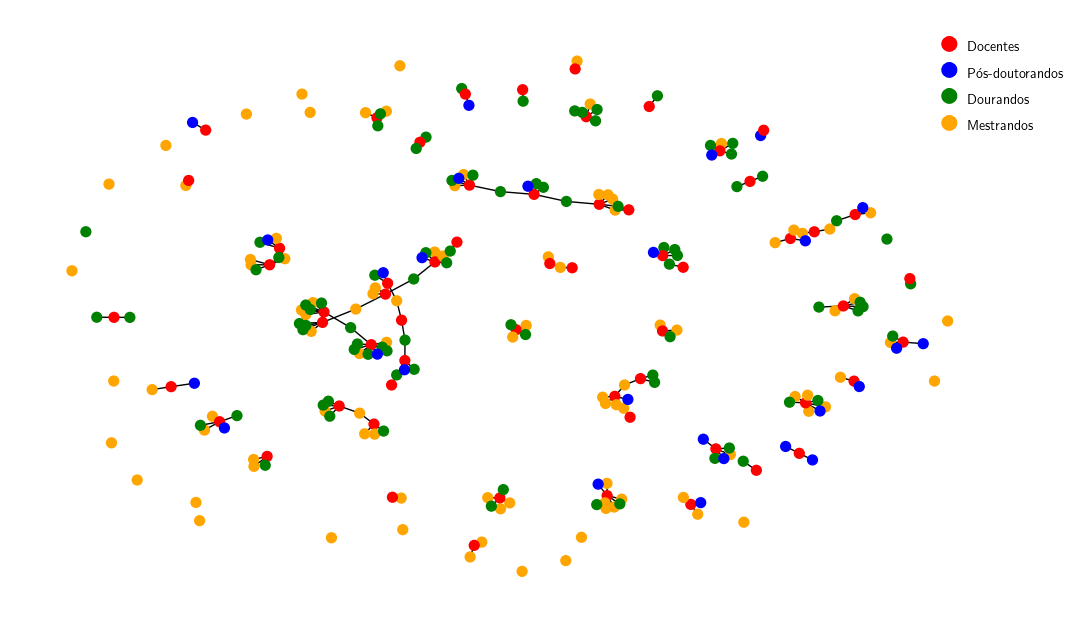

In [86]:
nodes = G.nodes()
plt.figure(figsize=(10,6))
pos = nx.draw(G,
              nodelist=nodes,
              node_color=[d.get(i,'red') for i in nodes], #usa a cor red para as chaves que nao se encontram do dic
              node_size=50)

# texto=('Docente\nPós-doutorandos\nDoutorandos\nMestrandos')
plt.text(1,1, 'Docentes')
plt.text(1,0.9, 'Pós-doutorandos')
plt.text(1,0.8, 'Dourandos')
plt.text(1,0.7, 'Mestrandos')
plt.text(0.94,0.99, '$\\bullet$', color='r', fontsize=30)
plt.text(0.94,0.89, '$\\bullet$', color='b', fontsize=30)
plt.text(0.94,0.79, '$\\bullet$', color='green', fontsize=30)
plt.text(0.94,0.69, '$\\bullet$', color='orange', fontsize=30)
plt.show()

#**Analise da Rede**

Usando as funçoes do NetworkX para anilisar e caracterizar a rede

Número de nós(nodes) e arestas(edges)

In [87]:
print(G)

Graph with 263 nodes and 200 edges


**Conectividade**

In [88]:
nx.is_connected(G)

False

**Densidade** fraçao de arestas que existem na rede em relaçao ao maior número de arestas que poderia existir.

In [89]:
nx.density(G)

0.005805009723391287

Quantas coponentes conexas existem na rede?

In [90]:
nx.number_connected_components(G)

65

In [91]:
nx.connected_components(G)

<generator object connected_components at 0x7d5f43cb1460>

Tamnho das componentes conexas

In [92]:
components = nx.connected_components(G)
sizes = [len(comp) for comp in components]

In [93]:
sizes = pd.Series(sizes)
sizes.describe()

count    65.000000
mean      4.046154
std       4.117155
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max      19.000000
dtype: float64

In [94]:
components = nx.connected_components(G)
nodes = max(components, key=len)
nodes

{'Ariete Righi',
 'Cláudio Laudares Passos Silva',
 'Fabio Cardoso Ofredi Maia',
 'Felipe De Morais Murta',
 'Gabriel Henrique Bargas Melo',
 'Isadora Costa Coppo',
 'Jhonatan Felipe Figueredo Vitor',
 'Jéssica Santos Lemos',
 'Leonardo Campos',
 'Letícia Lima Rios Rioga',
 'Lucas Liberal Fonseca',
 'Marcos Pimenta',
 'Maria Clara Godinho De Oliveira',
 'Renato Veloso Amaral Boaventura',
 'Rodrigo Gribel',
 'Thiago Seniuk Carrara',
 'Tiago Amarante De Barros Cardoso',
 'Tiago Campolina Barbosa',
 'Yuri Hayashi Isayama'}

**Distribuição de graus**

In [95]:
degree_list = [degree for node, degree in G.degree]
degree_series = pd.Series(degree_list)
degree_series.describe()

count    263.000000
mean       1.520913
std        1.461510
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
dtype: float64

Temos uma rede com 241 nós (count), grau
médio (mean) 1,66, grau mínimo (min) 1 e grau máximo (max) 9

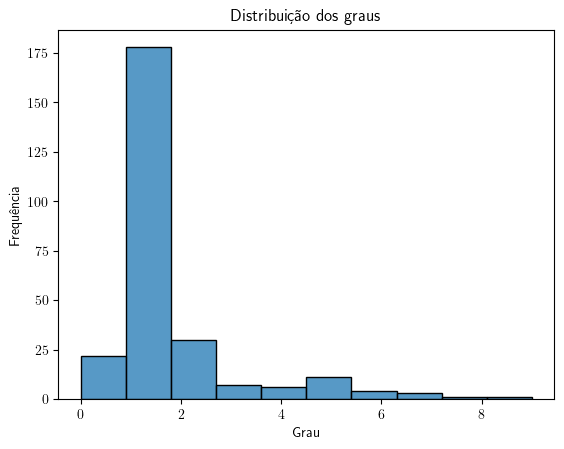

In [96]:
sns.histplot(degree_series)
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Distribuição dos graus')
plt.show()

Gráfico de ranqueamento

Text(0, 0.5, 'Grau do nó')

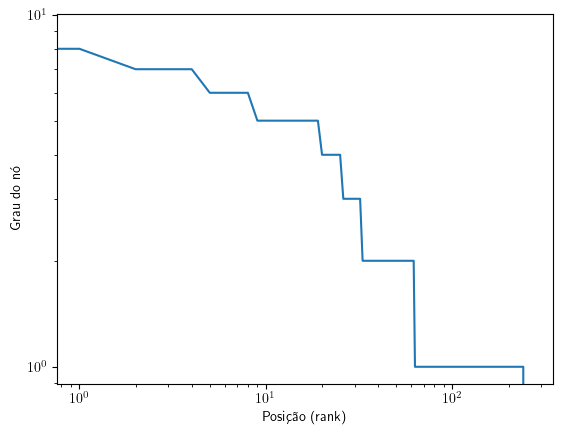

In [97]:
y = degree_series.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau do nó')

In [98]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [99]:
nodes=G.nodes()
labels=list(G.nodes())
#nodes=list(range(len(labels)))
node_color=[]
print(type(labels))
for i in labels:
    cor=d.get(i,'red')
    node_color.append(cor)
i=0
for node in nodes:
    G.nodes[node]['title']=labels[i]
    G.nodes[node]['color']=d.get(node,'red')
    i=i+1

<class 'list'>


In [100]:
from pyvis.network import Network

In [101]:
nt = Network(select_menu=True, cdn_resources='remote')
# populates the nodes and edges data structures
nt.from_nx(G)
nt.toggle_physics(True)
#nt.add_nodes(nodes, color=node_color, title=labels)
nt.save_graph("G.html")

A Rede é muito desconexa. Agora vou usar as publicaçoes recentes (2020-2024) para criar mais um criterio de aresta coautoria de paper.

In [102]:
url4='https://www.fisica.ufmg.br/biblioteca/producao-cientifica/'

In [103]:
import requests

In [104]:
response = requests.get(url4)
print(response)
response.text

<Response [200]>


'<!DOCTYPE html>\r\n<html lang="pt-BR" prefix="og: http://ogp.me/ns#"><head>\r\n    <meta charset="UTF-8">\r\n\t\t    <link rel="profile" href="http://gmpg.org/xfn/11">\r\n    <link rel="pingback" href="https://www.fisica.ufmg.br/biblioteca/xmlrpc.php">    \r\n                <link rel="shortcut icon" href="https://www.fisica.ufmg.br/biblioteca/wp-content/uploads/sites/5/2017/12/fisica-favicon.png">\r\n            <title>Produção Científica - Biblioteca da Física</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0">\n<!-- This site is optimized with the Yoast SEO plugin v7.9 - https://yoast.com/wordpress/plugins/seo/ -->\n<link rel="canonical" href="https://www.fisica.ufmg.br/biblioteca/producao-cientifica/" />\n<meta property="og:locale" content="pt_BR" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Produção Científica - Biblioteca da Física" />\n<meta property="og:url" content="https:


Os artigos começam e terminan com` <p>` tags entao posso usar BeatifulSoup para encontrar todas as `<p>` tags e depois seleccionar apenas os artigos. `<p>` representa um parágrafo

In [105]:
from bs4 import BeautifulSoup
doc=BeautifulSoup(response.text, 'lxml')

In [106]:
paper=doc.find_all('p')

In [107]:
papers2024=[]
for i in range(18):
  j=4*i+12
  print(paper[j].text)
  papers2024.append(paper[j].text)


[1] ARCADI, G.; DORSCH, G. C.; NETO, J. P.; QUEIROZ, F. S.; OVIEDO-TORRES, Y. M. Probing a dark sector with collider physics, direct detection, and gravitational waves. Physics Letters, Section B: Nuclear, Elementary Particle and High-Energy Physics, v. 848, Jan. 2024.
  
[2] AREDES, A. M.; SALDANHA, P. L. Association between quantum paradoxes based on weak values and a realistic interpretation of quantum measurements. Physical Review A, v. 109, n. 2, Feb. 2024.
  
[3] CALIXTO, T. R.; SALDANHA, P. L. Describing two-mode squeezed-light experiments without two-mode entanglement or squeezing. Optics Communications, v. 550, 1 Jan. 2024.
  
[4] CANÇADO, L. G.; MONKEN, V. P.; CAMPOS, J. L. E.; SANTOS, J. C. C.; BACKES, C.; CHACHAM, H.; NEVES, B. R. A.; JORIO, A. Science and Metrology of defects in graphene using Raman Spectroscopy. Carbon, v. 220, 20 Feb. 2024.
  
[5] DOS SANTOS, A. E. A.; GUADALUPE, J. L.; ALBERGARIA, J. D. S.; ALMEIDA, I. A.; MOREIRA, A. M. S.; COPOLA, A. G. L.; DE PAULA, 

In [108]:
papers2024[2]

'\xa0\xa0\n[3] CALIXTO, T. R.; SALDANHA, P. L. Describing two-mode squeezed-light experiments without two-mode entanglement or squeezing. Optics Communications, v. 550, 1 Jan. 2024.'

In [109]:
#Removendo a informaçao que nao preciso do lado esquerdo
for i in range(len(papers2024)):
  papers2024[i]=papers2024[i].lstrip('[]0123456789\xa0\n ')



In [110]:
#testando que a saída
papers2024[2]

'CALIXTO, T. R.; SALDANHA, P. L. Describing two-mode squeezed-light experiments without two-mode entanglement or squeezing. Optics Communications, v. 550, 1 Jan. 2024.'

Como preciso apenas dos autores vou remover a informaçao da direita depois do ultimo autor e depois separar usando ';'

In [111]:
import re


In [112]:

for i in range(len(papers2024)):
  s=papers2024[i]
  papers2024[i]=re.sub(r"\s[A-Z][a-z].*", "", s).split("; ")
papers2024[0]

['ARCADI, G.',
 'DORSCH, G. C.',
 'NETO, J. P.',
 'QUEIROZ, F. S.',
 'OVIEDO-TORRES, Y. M.']

In [113]:
len(papers2024)

18

In [114]:
papers2024[1]

['AREDES, A. M.', 'SALDANHA, P. L.']